# Titanic: Machine Learning from Disaster

Predict survival on the Titanic and get familiar with ML basics.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [95]:
TRAIN_FILEPATH = "./data/train.csv"

In [96]:
df = pd.read_csv(TRAIN_FILEPATH)

## Data Dictionary

| Variable | Definition | Key |
|----------|------------|-----|                       
| Survival | Survival   | 0 = No, 1 = Yes |
| Pclass   | Ticket     | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex      | Sex        |     |
| Age      | Age in years |   |
| Sibsp    | Number of siblings or spouses aboard |
| Parch    | Number of parents or children aboard |
| Ticket   | Ticket number |  |
| Fare     | Passenger fare | |
| Cabin    | Cabin number  |  |
| Embarked | Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton |


In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Cleaning

The DataFrame info shows that the following columns contain Null values:

1. Age with 177 null values
2. Cabin with 687 null values
3. Embarked with null values

Out of the 3 columns I belive Age is more import than which cabin number the passengers are in or where they embarked from.

Now 177 null values is a significant number they cannot be ignore by assuming it doesnt exist. To fill forward or backwards method for age would be a correct approach because its not in laid out in a timeseries manner that the order matters.

A good approach might be to fill the null values with either mean values or median.

### Fill Missing Age Values 

In [99]:
age_mean = df["Age"].mean()
age_median = df["Age"].median()
age_max = df["Age"].max()
age_min = df["Age"].min()

print("Mean Age Value: {}".format(age_mean))
print("Median Age Value: {}".format(age_median))
print("Max Age Value: {}".format(age_max))
print("Min Age Value: {}".format(age_min))

Mean Age Value: 29.69911764705882
Median Age Value: 28.0
Max Age Value: 80.0
Min Age Value: 0.42


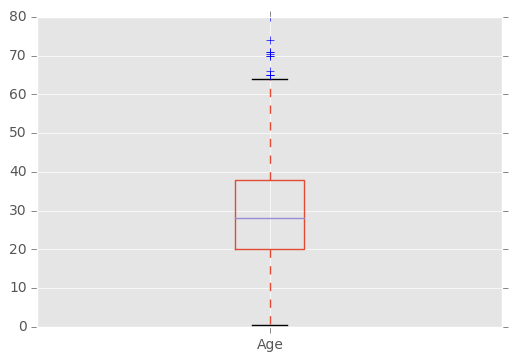

In [100]:
df.boxplot("Age")

With the mean and median very close to each other that means the data is near evenly distributed. With the boxplot it shows some outliers in the data which may contribute to a slightly higher mean.

In the case of filling missing values I would choose mean.

In [101]:
df["Age"].fillna(value=df["Age"].mean(), inplace=True)

df.info()  # To check if all the null values for age is filled in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Filling Missing Embarked Value

In [110]:
embarked_df = df[df["Embarked"].isnull()]
embarked_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Finding Someone living in the same Cabin or holding the same ticket number will provide us with information that can tell where they embarked from.

In [112]:
df[(df['Embarked'].notnull()) & ((df['Ticket'] == '113572') | (df['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Because this yielding no results, I will fill the missing values with the Embarked Values which has occured the most.

In [119]:
print("Embarked from: \nCherbourg, C: {}\nQueenstown, Q: {}\nSouthampton, S: {}".format(len(df[df["Embarked"] == "C"]),
                                                                                       len(df[df["Embarked"] == "Q"]),
                                                                                       len(df[df["Embarked"] == "S"])))

Embarked from: 
Cherbourg, C: 168
Queenstown, Q: 77
Southampton, S: 644


In [121]:
df["Embarked"].fillna(value="S", inplace=True)

df.info()  # To check if all the null values for embarked is filled in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Remove un-wanted columns

In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The following columns add no value, PassengerId, Name, Ticket, Cabin.


Check PassengerId vs fa